# Black Friday Dataset  EDA And Feature Engineering 

Prolem Staement A retail company "ABC private Limited" wants to understand the customer purchase behaviour( specially, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics(age,gender,matital status,city_type,stay_in_current_city),product details(product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")


In [2]:
# import Dataset
dftrain = pd.read_csv("D:/7 mentor/Statistics/train.csv")
dftrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
# Load test Dataset

dftest  = pd.read_csv("D:/7 mentor/Statistics/test.csv")
dftest.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [75]:

import pandas as pd

df = pd.concat([dftrain, dftest], ignore_index=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  float64
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          610029 non-null  float64
 10  Product_Category_3          400420 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 71.7+ MB


In [78]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,783667.000000,783667.000000,783667.000000,610029.000000,400420.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,10.574492,14.021080,9263.968713
std,1.727592e+03,6.522206,0.491793,3.878160,5.175716,3.575832,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,6.000000,14.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,13.000000,16.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,16.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [79]:
#Drop valueless Column
df.drop(['User_ID'], axis = 1, inplace =True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [80]:
# Hadling Categorical Feature Gender 

df["Gender"] = df["Gender"].map({'F':0,"M":1})

In [81]:
df.head(20)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0.0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0.0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0.0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1.0,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,1.0,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,1.0,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,1.0,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,1.0,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,1.0,26-35,20,A,1,1,8,NaN,NaN,7871.0


In [82]:
# Hadling Categorical Feature Age 
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25', nan],
      dtype=object)

In [83]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df['Age']

0         1.0
1         1.0
2         1.0
3         1.0
4         7.0
         ... 
783662    NaN
783663    NaN
783664    NaN
783665    NaN
783666    NaN
Name: Age, Length: 783667, dtype: float64

In [84]:
df.head(12)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,1.0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0.0,1.0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0.0,1.0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0.0,1.0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1.0,7.0,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,1.0,3.0,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,1.0,5.0,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,1.0,5.0,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,1.0,5.0,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,1.0,3.0,20,A,1,1,8,NaN,NaN,7871.0


In [85]:
df.drop('City_Category',axis=1,inplace=True)

In [86]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,1.0,10,2,0,3,NaN,NaN,8370.0
1,P00248942,0.0,1.0,10,2,0,1,6.0,14.0,15200.0
2,P00087842,0.0,1.0,10,2,0,12,NaN,NaN,1422.0
3,P00085442,0.0,1.0,10,2,0,12,14.0,NaN,1057.0
4,P00285442,1.0,7.0,16,4+,0,8,NaN,NaN,7969.0


In [87]:
#missing Data Hadling 

df.isnull().sum()

Product_ID                         0
Gender                        233599
Age                           233599
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                      233599
dtype: int64

In [88]:
#Focus On replacing Missing Values 

df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [89]:
df["Product_Category_2"].value_counts()

Product_Category_2
16.0    134031
8.0      91317
14.0     78834
2.0      70498
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: count, dtype: int64

In [90]:
df["Product_Category_2"].mode()[0]

16.0

In [91]:
#Replace the missing values with mode 

df['Product_Category_2']= df['Product_Category_2'].fillna(df['Product_Category_3'].mode()[0])

In [92]:
df['Product_Category_2'].isnull().sum()

0

In [93]:
# Replacing the missing Values with Mode in Product category 2 columns  
df["Product_Category_3"].mode()[0]
df['Product_Category_3']= df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [94]:
df['Product_Category_3'].isnull().sum()

0

In [95]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,1.0,10,2,0,3,16.0,16.0,8370.0
1,P00248942,0.0,1.0,10,2,0,1,6.0,14.0,15200.0
2,P00087842,0.0,1.0,10,2,0,12,16.0,16.0,1422.0
3,P00085442,0.0,1.0,10,2,0,12,14.0,16.0,1057.0
4,P00285442,1.0,7.0,16,4+,0,8,16.0,16.0,7969.0


In [96]:
df['Purchase'].isnull().sum()

233599

In [97]:
df["Purchase"].mean()

9263.968712959126

In [107]:
df['Purchase']= df['Purchase'].fillna(9263.97)

In [108]:
df['Purchase'].isnull().sum()

0

In [105]:
df.isnull().sum()

Product_ID                         0
Gender                        233599
Age                           233599
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                           0
dtype: int64

<Axes: xlabel='Age', ylabel='Purchase'>

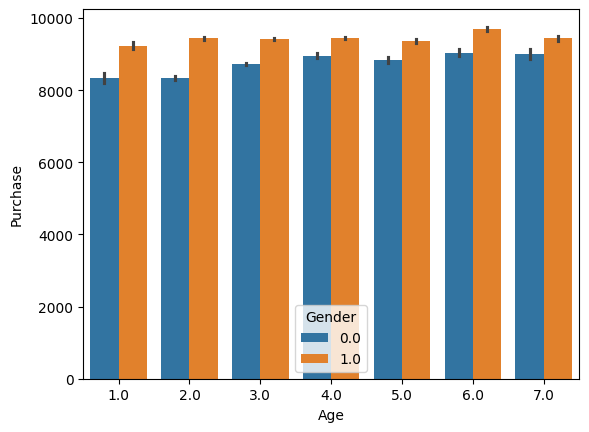

In [110]:
# Visualizationn Age Vs Purchased
sns.barplot(x="Age", y="Purchase", hue="Gender", data=df)

Observation

purchasing of man is high then women

<Axes: xlabel='Occupation', ylabel='Purchase'>

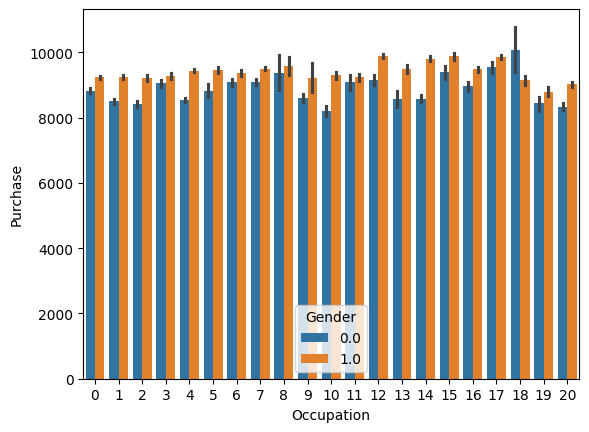

In [112]:
# Visualizationn Occupation Vs Purchased
sns.barplot(x="Occupation", y="Purchase", hue="Gender", data=df)


<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

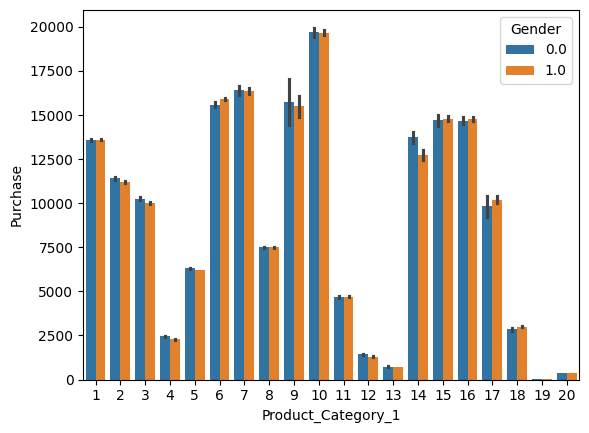

In [114]:
# Visualizationn Product_Category_1 Vs Purchased
sns.barplot(x="Product_Category_1", y="Purchase", hue="Gender", data = df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

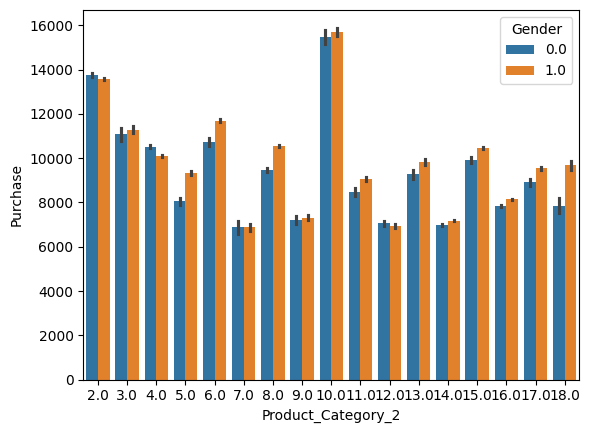

In [117]:
# Visualizationn Product_Category_2 Vs Purchased
sns.barplot(x="Product_Category_2", y="Purchase", hue="Gender", data = df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

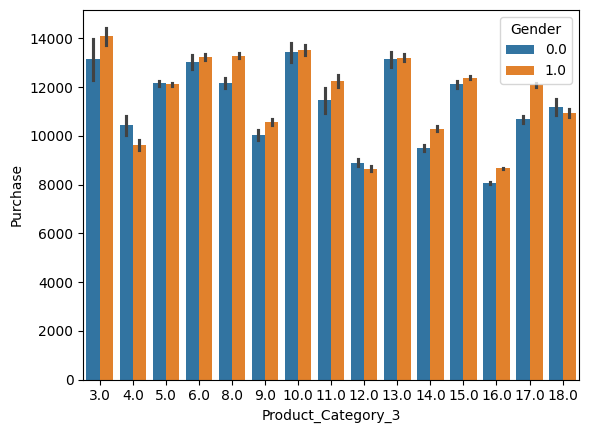

In [118]:
# Visualizationn Product_Category_3 Vs Purchased
sns.barplot(x="Product_Category_3", y="Purchase", hue="Gender", data = df)